In [8]:
import pandas as pd
import numpy as np

In [7]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 970.2 kB/s eta 0:00:000:00:010:00:01:01


In [37]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


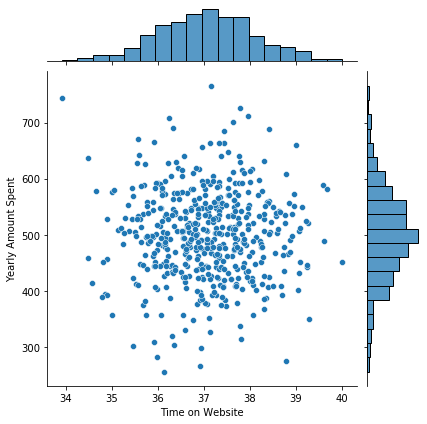

In [19]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

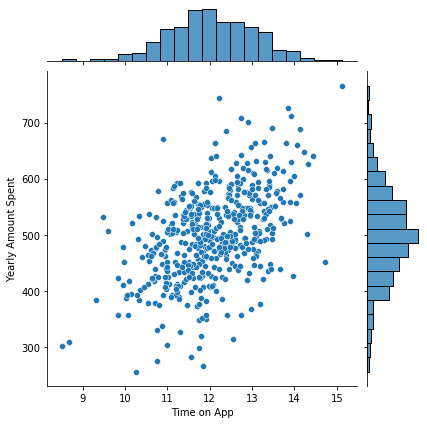

In [20]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

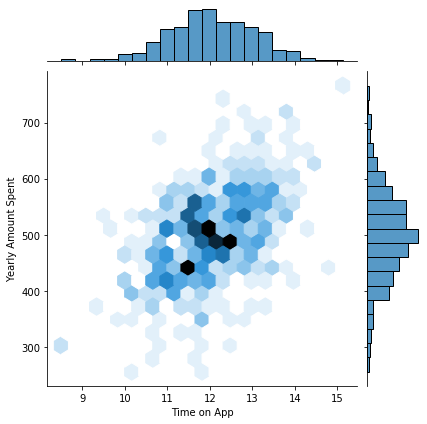

In [21]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',kind='hex')

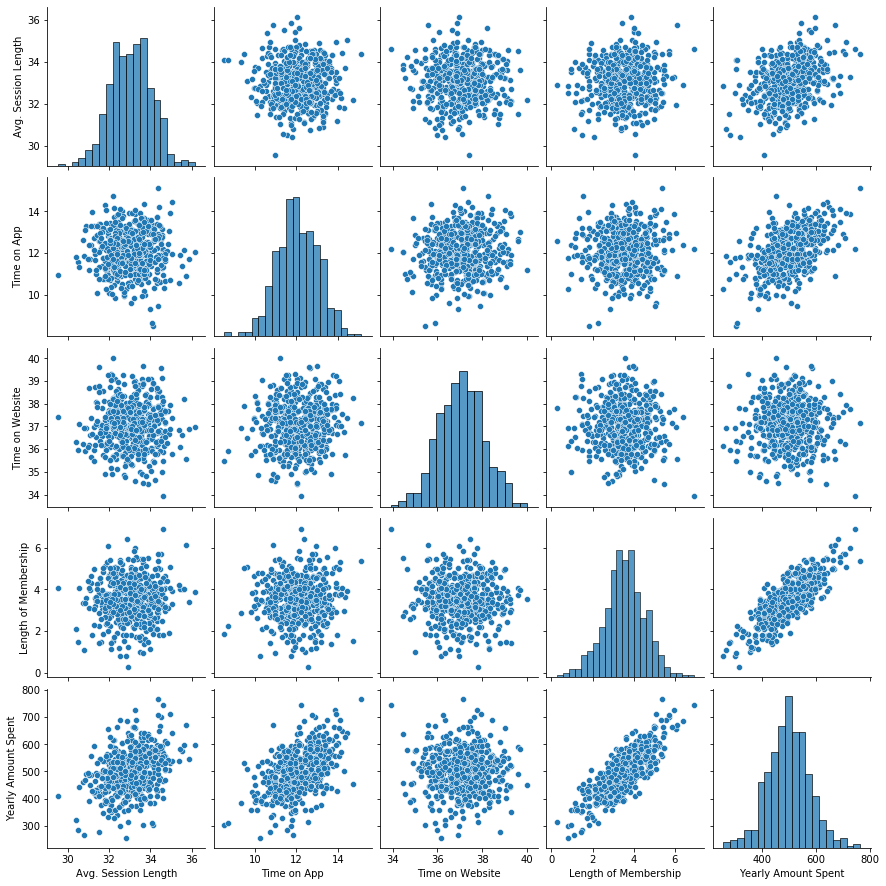

In [25]:
sns.pairplot(data=df )

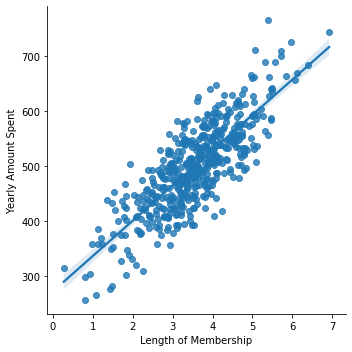

In [26]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [27]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [39]:
X=df[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent'] 


In [43]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [47]:
from sklearn.model_selection import train_test_split
# help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

Text(0, 0.5, 'predicted value')

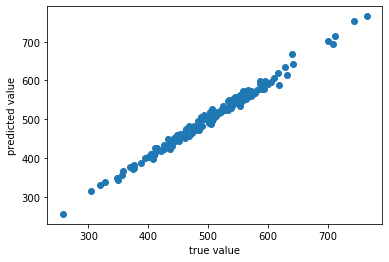

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('true value')
plt.ylabel('predicted value')

In [53]:
from sklearn import metrics 
print('MSE',metrics.mean_squared_error(y_test,predictions))

MAE 79.81305165097427


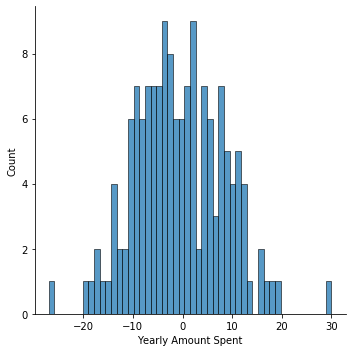

In [56]:
sns.displot((y_test-predictions),bins=50)

In [59]:
pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
